# Assignment Gradient Descent 

Imagine a building that uses a complex energy consumption system to regulate its temperature and lighting. The energy consumption system has several variables that affect its efficiency, such as the temperature setpoint, lighting levels, and ventilation rates. The function J(x) = x2 - 4x + 3 can be seen as a simplified model of the efficiency of the energy consumption system, where x represents one of the variables that affect the system's efficiency. For example, x could represent the temperature setpoint. By adjusting the value of x using Gradient Descent, the building managers can find the optimal temperature setpoint that would minimize the value of the cost function and result in the most efficient energy consumption system. This optimization would result in lower energy consumption costs and reduced carbon emissions, while still maintaining a comfortable environment for the building occupants. You will be implementing the Gradient Descent algorithm to find the minimum of the quadratic cost function. 



## Background
Gradient Descent is an iterative optimization algorithm that is commonly used to minimize a cost function by adjusting the parameters of a model. The algorithm works by iteratively updating the parameters in the opposite direction of the gradient of the cost function. The learning rate determines the size of the step taken in the opposite direction of the gradient.

### Equation
j(x) = x^2 - 4x + 3

### Min Value using Derivative
x = 2

### Q1) Implement the following function:

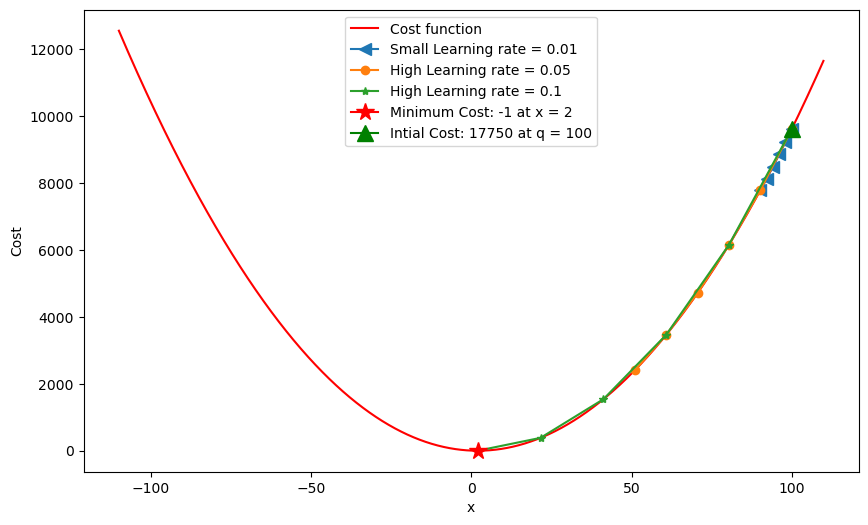

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def funJ(x):
  # x² - 4x + 3
  return x**2 - 4*x + 3

def derivative(x):
  # 2x - 4
  return 2*x - 4

def gradient_descent(J, der, x, alpha, num_iters):
    """
    Performs Gradient Descent to optimize the cost function J(theta).

    Arguments:
    x -- initial parameter value (scalar)
    alpha -- learning rate (scalar)
    num_iters -- the number of iterations to run Gradient Descent (scalar)

    Returns:
    x_final -- optimized parameter value
    J_history -- vector of cost function values for each iteration (num_iters x 1)
    """

    x_values = [x]
    y_values = [J(x)]

    for i in range(num_iters):
      current_x = x_values[-1]
      new_x = current_x - alpha * der(x)
      x_values.append(new_x)
      y_values.append(J(new_x))

    # Your code here
    x_final = x_values[-1]
    x_history = x_values
    J_history = y_values
    return (x_final, x_history, J_history)

# Plot cost function
x_range = np.arange(-110, 110, 0.1)
cost_range = funJ(x_range)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x_range, cost_range, label='Cost function', color='red')

# Running gradient descent
x_final_1, x_values_1, cost_values_1 = gradient_descent(funJ, derivative, 100, 0.01, 5)
x_final_2, x_values_2, cost_values_2 = gradient_descent(funJ, derivative, 100, 0.05, 5)
x_final_3, x_values_3, cost_values_3 = gradient_descent(funJ, derivative, 100, 0.1, 5)

# Plot gradient descent paths
ax.plot(x_values_1, cost_values_1, label='Small Learning rate = 0.01', marker='<', markersize = 8)
ax.plot(x_values_2, cost_values_2, label='High Learning rate = 0.05', marker='o')
ax.plot(x_values_3, cost_values_3, label='High Learning rate = 0.1', marker='*')

# Highlight minimum value
min_index = np.argmin(cost_range)
min_x = x_range[min_index]
min_cost = cost_range[min_index]
ax.plot(2, -1, marker='*', color='red', label=f'Minimum Cost: -1 at x = 2', markersize = 13)
ax.plot(100, funJ(100), marker='^', color='green', label=f'Intial Cost: 17750 at q = 100', markersize = 12)

# Add axis labels and legend
ax.set_xlabel('x')
ax.set_ylabel('Cost')
ax.legend()

plt.show()

### Q2) Implementing different convergence criteria: Convergence criteria for gradient descent refers to the condition under which the algorithm is considered to have found an acceptable solution. There are several common convergence criteria for gradient descent, including, 

a. Maximum number of iterations: In the previous code, you have limited the number of iterations that the algorithm will perform. The algorithm stops after a fixed number of iterations, regardless of the change in the objective function.

b. Minimum change in objective function: The algorithm can also be stopped when the change in the objective function between consecutive iterations falls below a certain threshold (called tolerance), indicating that the algorithm has converged to a preferred minimum. In other words, we need some minimum improvement in the objective function value between consecutive iterations that is considered significant enough to continue the optimization process. It is often specified as a small positive number, such as 1e-3 or 1e-6.

Choosing an appropriate tolerance value depends on the problem being solved and the computational resources available. A smaller tolerance value can lead to a more accurate solution but may require more iterations to achieve convergence, while a larger tolerance value can result in faster convergence but may not produce as accurate a solution. It is important to balance accuracy with computational efficiency when selecting a tolerance value for gradient descent.

**Implement the following function:**

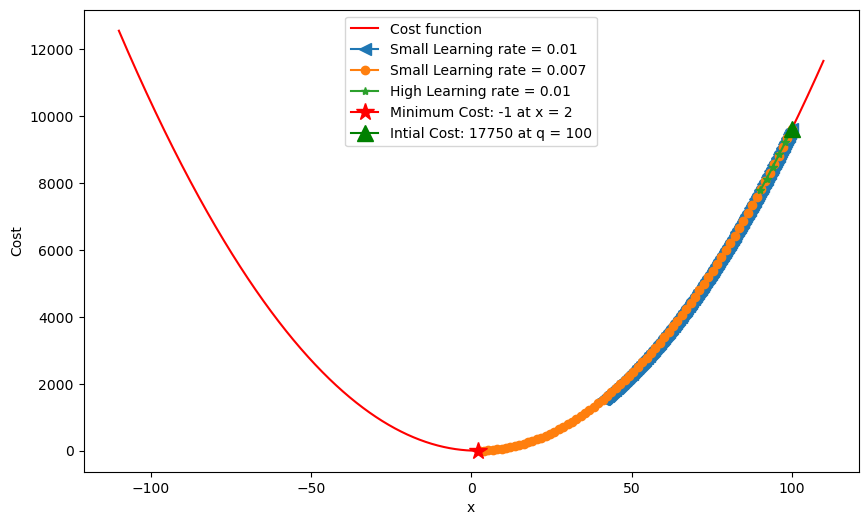

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def funJ(x):
  # x² - 4x + 3
  return x**2 - 4*x + 3

def derivative(x):
  # 2x - 4
  return 2*x - 4

def gradient_descent(J, dJ, x, alpha, tol, max_iters):
    """
    Performs gradient descent to minimize the objective function J.

    Arguments:
    J -- objective function to be minimized
    dJ -- gradient of the objective function
    x -- initial guess for the solution
    alpha -- learning rate
    tol -- tolerance for convergence
    max_iters -- maximum number of iterations to perform

    Returns:
    x -- solution to the optimization problem
    """

    # Your code here

    #Steps: 
    #1) compute the gradient and update x        
    #2) compute the improvement in the objective function
    #3) update x and iteration counter

    x_values = [x]
    y_values = [J(x)]

    for i in range(max_iters):
        current_x = x_values[-1]
        new_x = current_x - alpha * dJ(x)
        if abs(J(new_x) - J(current_x)) < tol:
            break
        x_values.append(new_x)
        y_values.append(J(new_x))      

    x_final = x_values[-1]
    x_history = x_values
    J_history = y_values
    return (x_final, x_history, J_history)

# Plot cost function
x_range = np.arange(-110, 110, 0.1)
cost_range = funJ(x_range)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x_range, cost_range, label='Cost function', color='red')

# Running gradient descent
x_final_1, x_values_1, cost_values_1 = gradient_descent(funJ, derivative, 100, 0.001, 0.000001, 300)
x_final_2, x_values_2, cost_values_2 = gradient_descent(funJ, derivative, 100, 0.007, 1, 100)
x_final_3, x_values_3, cost_values_3 = gradient_descent(funJ, derivative, 100, 0.01, 50, 5)

# Plot gradient descent paths
ax.plot(x_values_1, cost_values_1, label='Small Learning rate = 0.01', marker='<', markersize = 8)
ax.plot(x_values_2, cost_values_2, label='Small Learning rate = 0.007', marker='o')
ax.plot(x_values_3, cost_values_3, label='High Learning rate = 0.01', marker='*')

# Highlight minimum value
min_index = np.argmin(cost_range)
min_x = x_range[min_index]
min_cost = cost_range[min_index]
ax.plot(2, -1, marker='*', color='red', label=f'Minimum Cost: -1 at x = 2', markersize = 13)
ax.plot(100, funJ(100), marker='^', color='green', label=f'Intial Cost: 17750 at q = 100', markersize = 12)

# Add axis labels and legend
ax.set_xlabel('x')
ax.set_ylabel('Cost')
ax.legend()

plt.show()